<a href="https://colab.research.google.com/github/rahelitapasaribu/asah-MLcourse/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rahelita_Pasaribu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

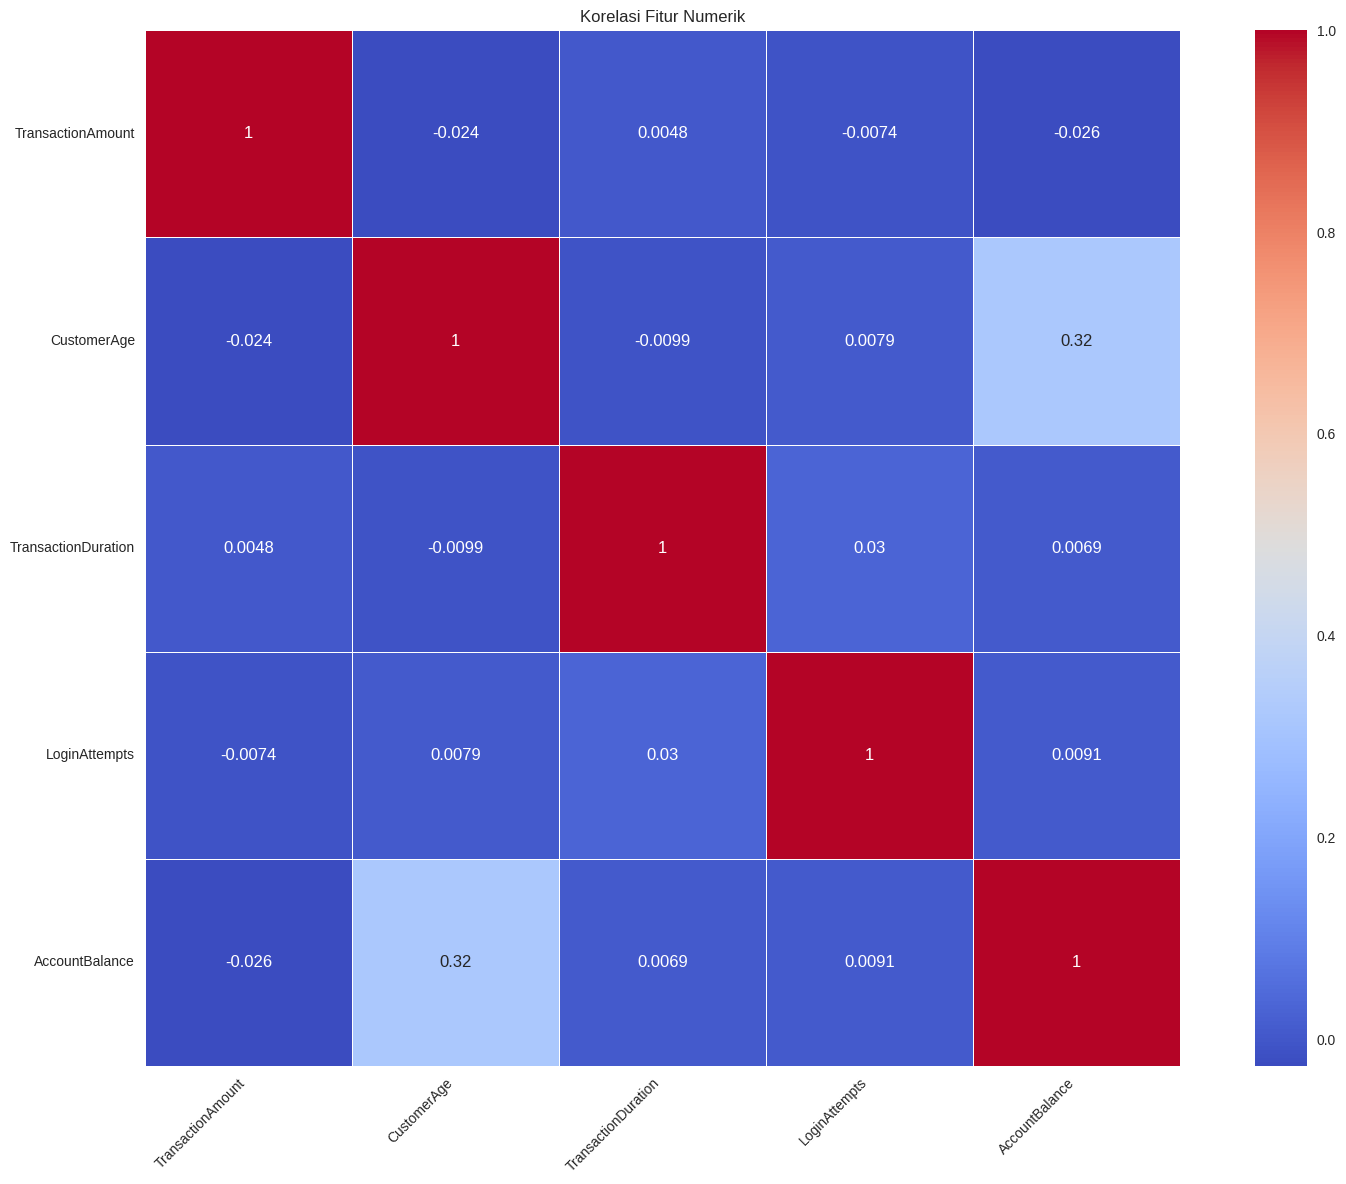

In [ ]:
plt.figure(figsize=(16, 12))
num_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square= True, linewidths=0.5)
plt.title('Korelasi Fitur Numerik')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

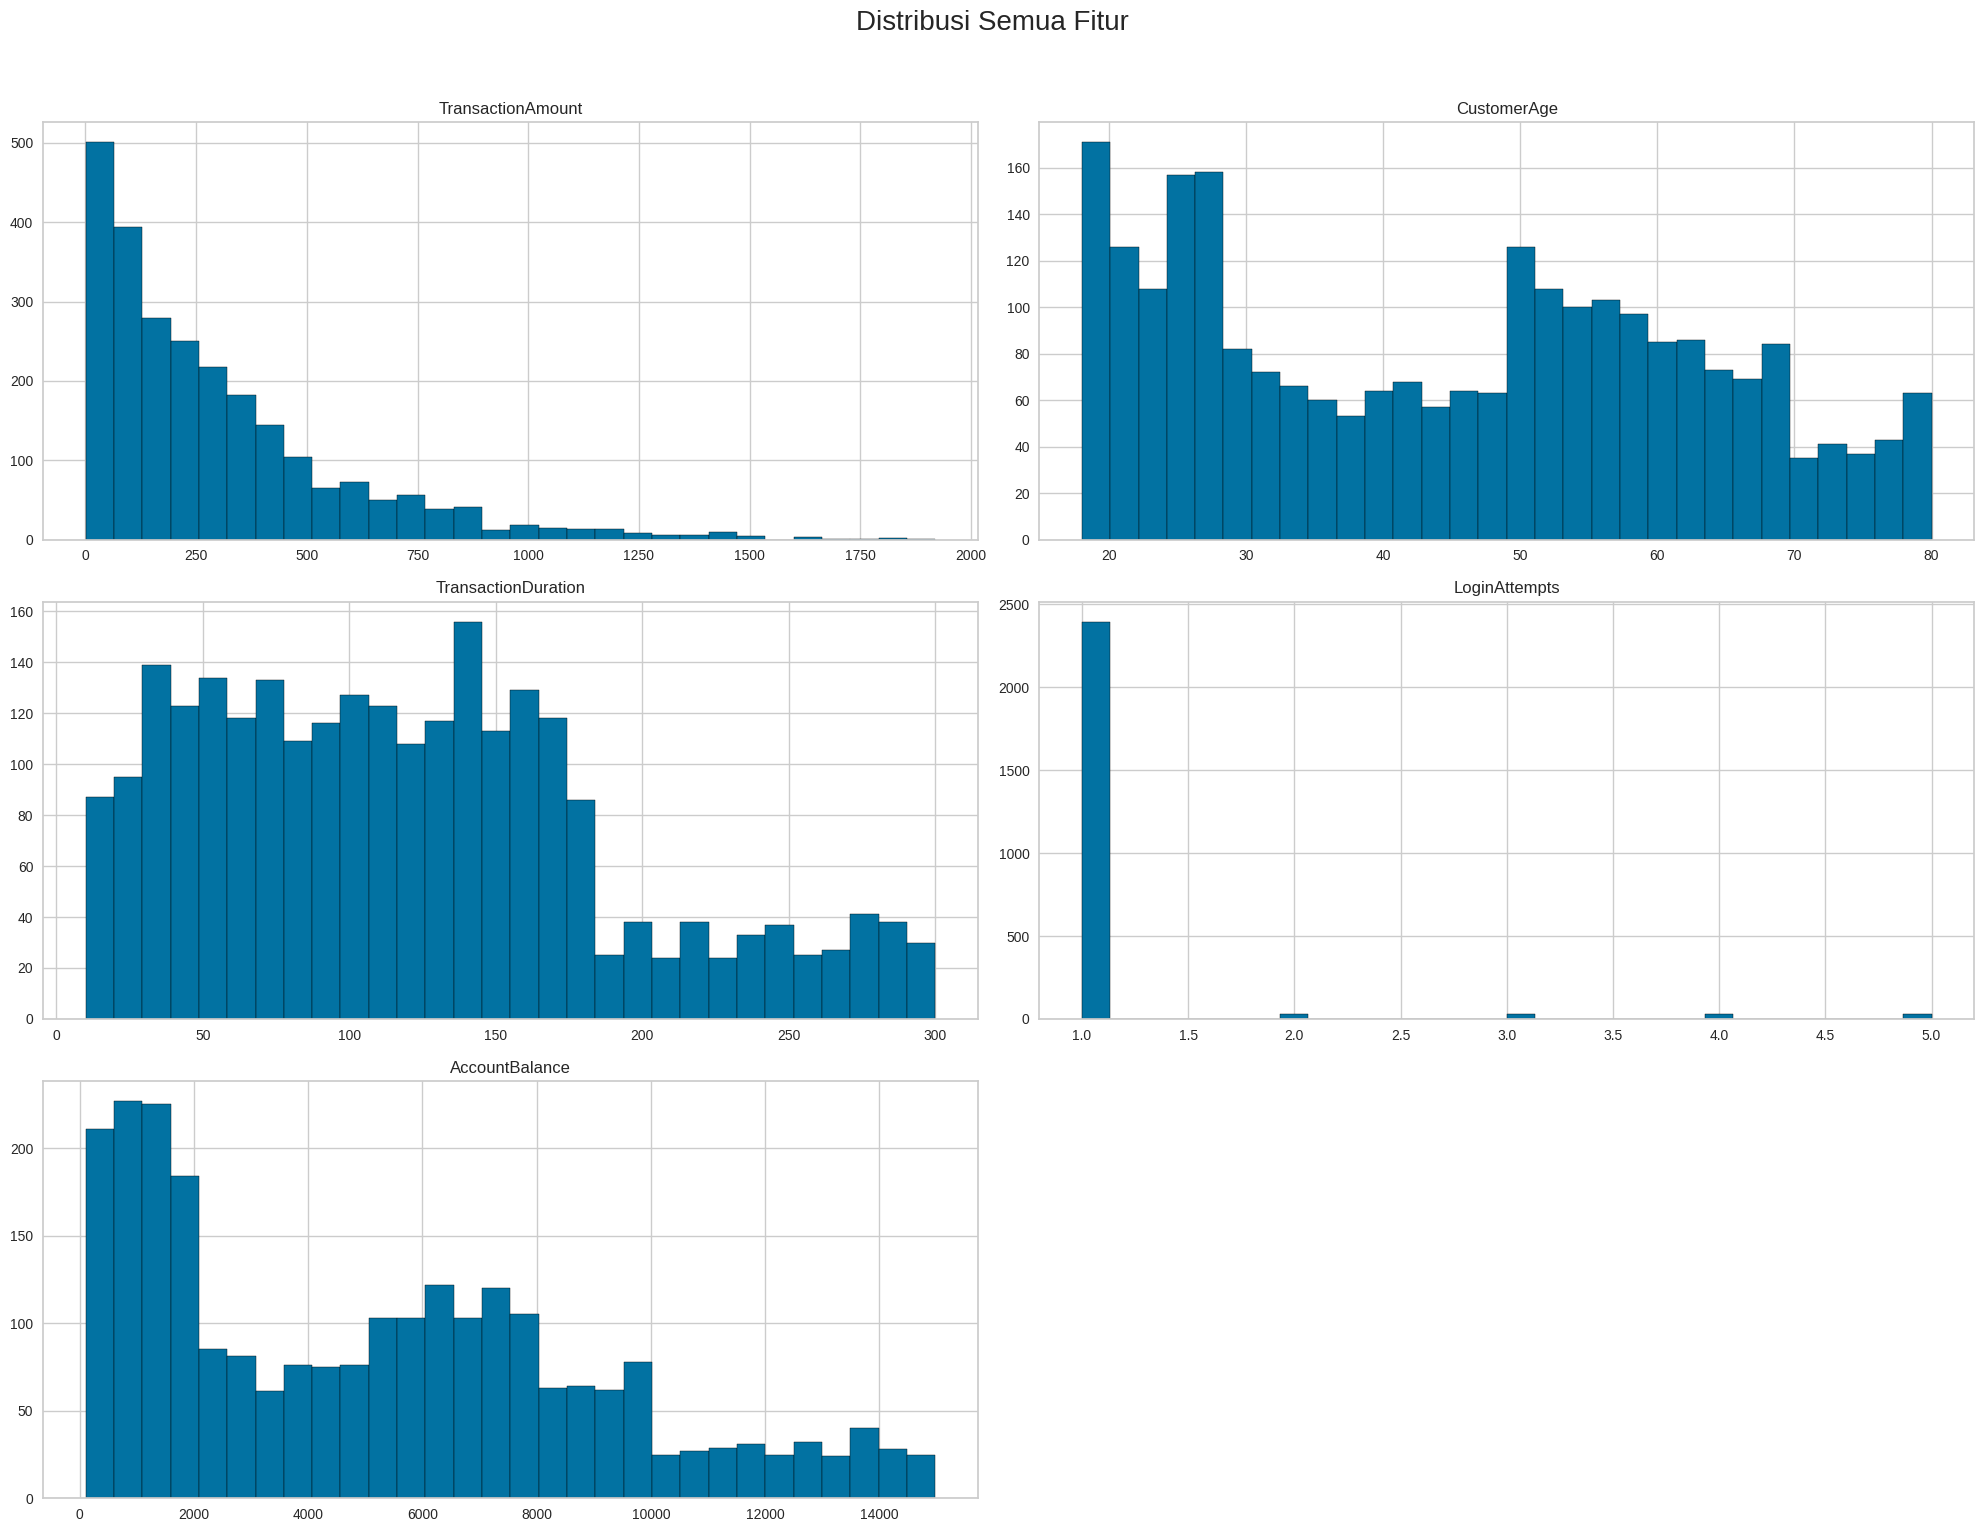

In [ ]:
df.hist(bins=30, figsize=(20,15), edgecolor='black')
plt.suptitle('Distribusi Semua Fitur', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

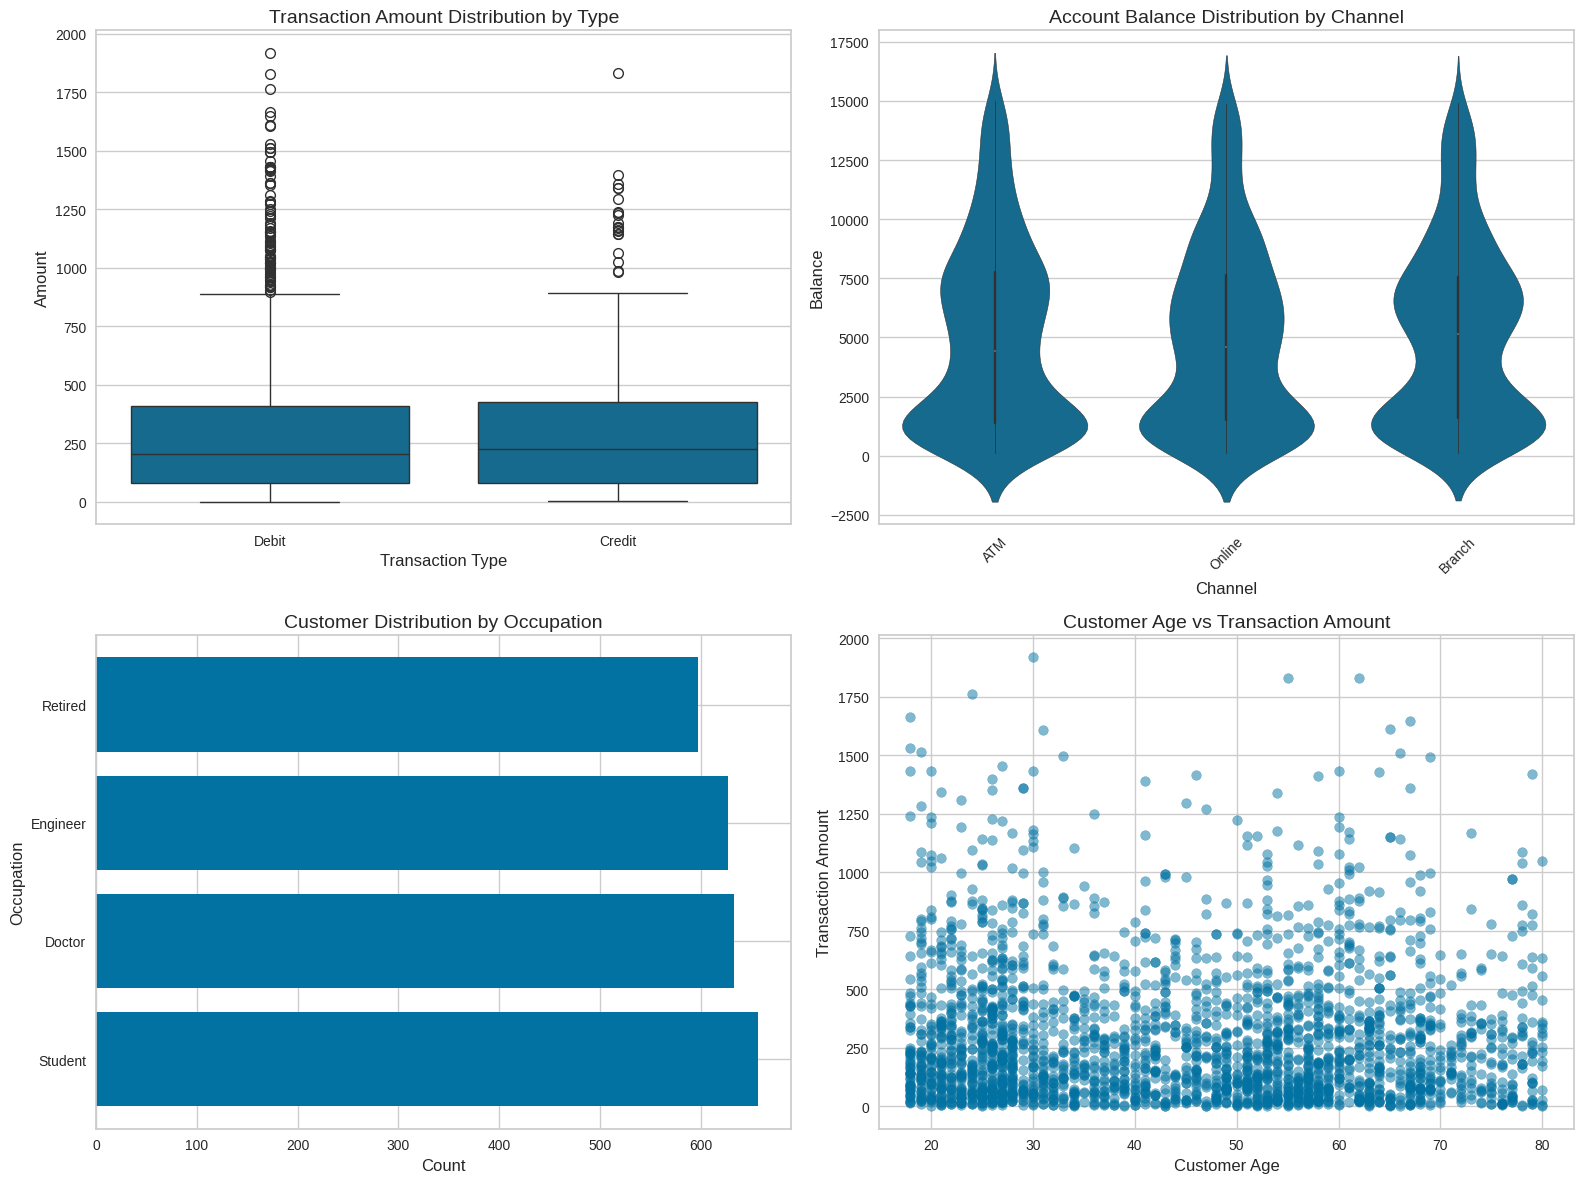

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', ax=axes[0, 0])
axes[0, 0].set_title('Transaction Amount Distribution by Type', fontsize=14)
axes[0, 0].set_xlabel('Transaction Type', fontsize=12)
axes[0, 0].set_ylabel('Amount', fontsize=12)

sns.violinplot(data=df, x='Channel', y='AccountBalance', ax=axes[0, 1])
axes[0, 1].set_title('Account Balance Distribution by Channel', fontsize=14)
axes[0, 1].set_xlabel('Channel', fontsize=12)
axes[0, 1].set_ylabel('Balance', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

occupation_counts = df['CustomerOccupation'].value_counts()
axes[1, 0].barh(occupation_counts.index, occupation_counts.values)
axes[1, 0].set_title('Customer Distribution by Occupation', fontsize=14)
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Occupation', fontsize=12)

axes[1, 1].scatter(df['CustomerAge'], df['TransactionAmount'], alpha=0.5)
axes[1, 1].set_title('Customer Age vs Transaction Amount', fontsize=14)
axes[1, 1].set_xlabel('Customer Age', fontsize=12)
axes[1, 1].set_ylabel('Transaction Amount', fontsize=12)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
df.duplicated().sum()

np.int64(21)

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

date_cols = ['TransactionDate', 'PreviousTransactionDate']
for col in date_cols:
    if col in df.columns:
        df = df.drop(columns=[col])
        if col in categorical_cols:
            categorical_cols.remove(col)

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,TX000001,AC00128,0.007207,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,TX000002,AC00455,0.195940,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,TX000003,AC00019,0.065680,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637
3,TX000004,AC00070,0.096016,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198
4,TX000005,AC00411,0.006874,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591


In [ ]:
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df = df.drop(columns=id_columns)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [ ]:
encoders = {}

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [ ]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

outlier_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']
for col in outlier_cols:
    df = handle_outliers_iqr(df, col)

print(f"Bentuk dataset setelah handle outlier: {df.shape}")
df.head()

Bentuk dataset setelah handle outlier: (2397, 9)


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738


In [ ]:
df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'],
                                         bins=3,
                                         labels=['Low', 'Medium', 'High'])

df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'],
                                   bins=[0, 30, 50, 100],
                                   labels=['Young', 'Middle', 'Senior'])

le_amount = LabelEncoder()
le_age = LabelEncoder()
df['TransactionAmount_Binned'] = le_amount.fit_transform(df['TransactionAmount_Binned'])
df['CustomerAge_Binned'] = le_age.fit_transform(df['CustomerAge_Binned'])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,1,0
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,2,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,1,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,1,0
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,1,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.0,2397.000000,2397.000000,2397.000000
mean,0.148065,0.788903,21.375887,1.013350,0.429441,1.531498,0.377573,0.0,0.335439,1.106383,0.022945
std,0.130404,0.437774,12.414387,0.831248,0.287683,1.153653,0.242403,0.0,0.262236,0.601845,0.149761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.042604,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093373,1.000000,0.000000
50%,0.110853,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308693,1.000000,0.000000
75%,0.214300,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.508058,1.000000,0.000000
max,0.471845,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,2.000000,1.000000


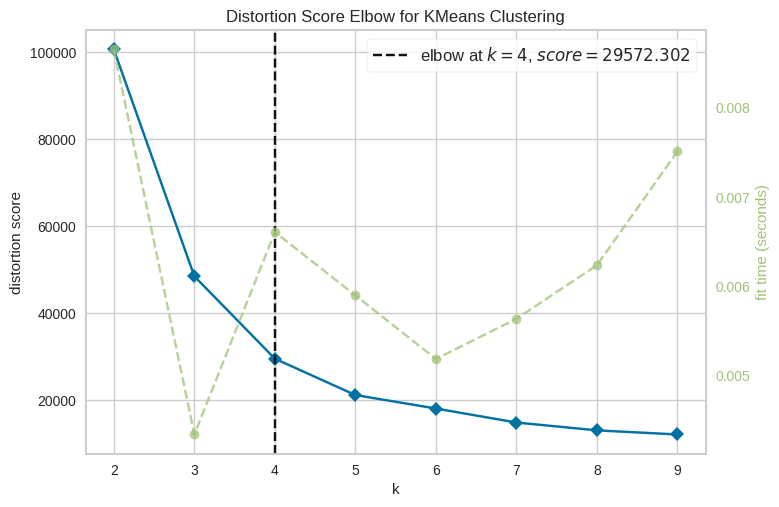

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df)
visualizer.show()

In [ ]:
optimal_k = 4
model_kmeans= KMeans(n_clusters=optimal_k, random_state=42)
model_kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
labels= model_kmeans.labels_
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5043


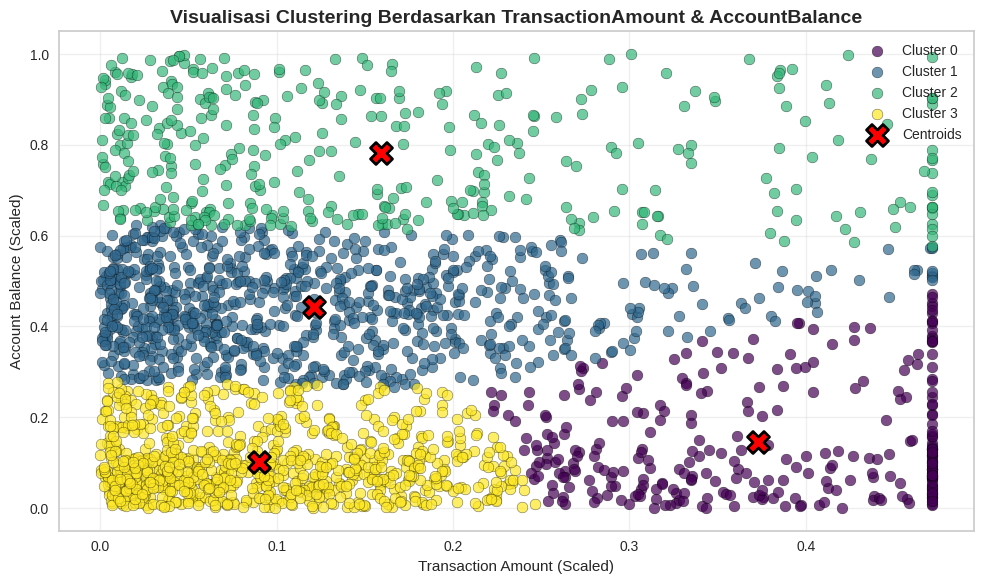

In [ ]:
amt_idx = df.columns.get_loc('TransactionAmount')
bal_idx = df.columns.get_loc('AccountBalance')

selected_features = ['TransactionAmount', 'AccountBalance']
X = df[selected_features]
df['Target'] = model_kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
colors = ['#440154', '#31688e', '#35b779', '#fde725']
for i in range(optimal_k):
    cluster_points = df[df['Target'] == i]
    plt.scatter(
        cluster_points['TransactionAmount'],
        cluster_points['AccountBalance'],
        s=60,
        color=colors[i],
        edgecolor='black',
        alpha=0.7,
        label=f'Cluster {i}'
    )

centroids = model_kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=250,
    c='red',
    marker='X',
    edgecolor='black',
    linewidths=2,
    label='Centroids'
)

plt.title('Visualisasi Clustering Berdasarkan TransactionAmount & AccountBalance', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('Account Balance (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df)

pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

model_pca = KMeans(n_clusters=optimal_k, random_state=42)
model_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
joblib.dump(model_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
df['Target'] = model_kmeans.labels_

cluster_analysis = df.groupby('Target').agg(['mean', 'min', 'max'])
cluster_analysis

TransactionAmount                     TransactionType          \
                    mean       min       max            mean min max   
Target                                                                 
0               0.372912  0.221529  0.471845        0.774510   0   2   
1               0.120813  0.000031  0.471845        0.796231   0   2   
2               0.159897  0.000459  0.471845        0.764550   0   2   
3               0.090035  0.000000  0.246471        0.797454   0   2   

         Location           Channel  ... LoginAttempts AccountBalance  \
             mean min max      mean  ...           max           mean   
Target                               ...                                
0       22.133987   0  43  0.960784  ...           0.0       0.145479   
1       20.685512   0  43  1.036514  ...           0.0       0.443505   
2       21.507937   0  43  1.023810  ...           0.0       0.781933   
3       21.728009   0  43  1.004630  ...           0.0       0.101185   

                           TransactionAmount_Binned          \
             min       max                     mean min max   
Target                                                        
0       0.000064  0.470759                 0.601307   0   2   
1       0.267211  0.624083                 1.206125   0   2   
2       0.577493  1.000000                 1.084656   0   2   
3       0.000000  0.277555                 1.196759   1   2   

       CustomerAge_Binned          
                     mean min max  
Target                             
0                0.026144   0   1  
1                0.008245   0   1  
2                0.002646   0   1  
3                0.045139   0   1  

[4 rows x 33 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya

### **Cluster 0: (Kelompok dengan aktivitas transaksi tinggi di lokasi lebih luas tapi saldo kecil)**
- **Rata-rata (mean) TransactionAmount:** 0.372912  
- **Rata-rata (mean) TransactionType:** 0.774510  
- **Rata-rata (mean) Location:** 22.133987  
- **Rata-rata (mean) Channel:** 0.960784  
- **Rata-rata (mean) AccountBalance:** 0.145479  
- **Analisis:**  
  Cluster ini menggambarkan kelompok pengguna dengan nilai transaksi relatif tinggi namun saldo akun tergolong kecil. Lokasi mereka cukup tersebar (area menengah ke tinggi). Jenis transaksi didominasi debit standar dengan frekuensi channel stabil. Kemungkinan besar kelompok ini adalah pengguna yang aktif melakukan transaksi kecil–menengah tetapi tidak menyimpan saldo besar di akun mereka.


### **Cluster 1: (Kelompok dengan saldo sedang dan frekuensi transaksi moderat)**
- **Rata-rata (mean) TransactionAmount:** 0.120813  
- **Rata-rata (mean) TransactionType:** 0.796231  
- **Rata-rata (mean) Location:** 20.685512  
- **Rata-rata (mean) Channel:** 1.036514  
- **Rata-rata (mean) AccountBalance:** 0.443505  
- **Analisis:**  
  Cluster ini berada di wilayah lokasi menengah dengan aktivitas transaksi cukup stabil. Nilai transaksi mereka sedang, dan saldo akun lebih tinggi dibanding cluster 0. Pola channel-nya aktif (sekitar 1), menunjukkan pengguna ini lebih sering memakai aplikasi atau platform digital. Bisa jadi kelompok ini terdiri dari pengguna reguler yang sering melakukan transaksi dengan nominal moderat dan menjaga saldo tetap aman.


### **Cluster 2: (Kelompok dengan saldo tinggi dan aktivitas transaksi konsisten)**
- **Rata-rata (mean) TransactionAmount:** 0.159897  
- **Rata-rata (mean) TransactionType:** 0.764550  
- **Rata-rata (mean) Location:** 21.507937  
- **Rata-rata (mean) Channel:** 1.023810  
- **Rata-rata (mean) AccountBalance:** 0.781933  
- **Analisis:**  
  Cluster ini menunjukkan kelompok pengguna dengan saldo akun tertinggi di antara semua cluster. Nilai transaksi mereka relatif stabil dan tidak terlalu fluktuatif. Lokasi mereka mencakup area menengah dengan kecenderungan aktivitas transaksi yang rutin. Cluster ini bisa diinterpretasikan sebagai pengguna loyal dengan stabilitas finansial tinggi dan tingkat kepercayaan terhadap sistem transaksi yang baik.

### **Cluster 3: (Kelompok dengan aktivitas transaksi rendah dan saldo rendah)**
- **Rata-rata (mean) TransactionAmount:** 0.090035  
- **Rata-rata (mean) TransactionType:** 0.797454  
- **Rata-rata (mean) Location:** 21.728009  
- **Rata-rata (mean) Channel:** 1.004630  
- **Rata-rata (mean) AccountBalance:** 0.101185  
- **Analisis:**  
  Cluster ini menggambarkan kelompok pengguna dengan nilai transaksi dan saldo yang paling rendah di antara seluruh cluster. Lokasi mereka relatif homogen di area menengah. Meskipun channel-nya masih aktif, nilai transaksi rendah mengindikasikan kelompok ini jarang bertransaksi atau hanya menggunakan sistem untuk kebutuhan dasar. Bisa jadi ini adalah kelompok pengguna pasif atau baru bergabung.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
if 'Target' not in df.columns:
    df['Target'] = model_kmeans.labels_

print(f"Jumlah data per cluster:")
print(df['Target'].value_counts().sort_index())


Jumlah data per cluster:
Target
0    306
1    849
2    378
3    864
Name: count, dtype: int64


In [ ]:
df.to_csv('data_clustering.csv', index=False)
print("\nData disimpan sebagai 'data_clustering.csv'")


Data disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
df_inverse = df.copy()

numeric_features_to_inverse = [col for col in numeric_cols if col not in ['Target', 'TransactionAmount_Binned', 'CustomerAge_Binned']]

df_inverse[numeric_features_to_inverse] = scaler.inverse_transform(df_inverse[numeric_features_to_inverse])
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,1,0,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,0,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,0,3
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,0,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,1,1,3


In [ ]:
for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1,0,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2,0,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,1,0,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,1,0,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,1,1,3


In [ ]:
numeric_analysis = df_inverse.groupby('Target')[numeric_features_to_inverse].agg(['mean', 'min', 'max'])
print("=== NUMERIC FEATURES ANALYSIS (AFTER INVERSE) ===")
print(numeric_analysis)

def mode_func(x):
    return x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]

if len(categorical_cols) > 0:
    categorical_analysis = df_inverse.groupby('Target')[categorical_cols].agg(mode_func)
    print("\n=== CATEGORICAL FEATURES (MODE) AFTER INVERSE ===")
    print(categorical_analysis)

=== NUMERIC FEATURES ANALYSIS (AFTER INVERSE) ===
       TransactionAmount                 CustomerAge              \
                    mean     min     max        mean   min   max   
Target                                                             
0             715.822876  425.34  905.66   41.228758  18.0  80.0   
1             232.082026    0.32  905.66   51.332155  18.0  80.0   
2             307.077963    1.14  905.66   47.759259  18.0  70.0   
3             173.023924    0.26  473.20   37.866898  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               118.379085  10.0  300.0           1.0  1.0  1.0   
1               118.843345  10.0  299.0           1.0  1.0  1.0   
2               122.719577  11.0  300.0           1.0  1.0  1.0   
3               119.122685  10.0  299.0           1.0  1.0  1.0   

   

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya **setelah inverse**

### **Cluster 0: (Nasabah Dewasa dengan Transaksi Moderat dan Saldo Rendah)**
- **Rata-rata (mean) TransactionAmount:** 715.82  
- **Rata-rata (mean) CustomerAge:** 41.23 tahun  
- **Rata-rata (mean) TransactionDuration:** 118.38 detik  
- **Rata-rata (mean) LoginAttempts:** 1 kali  
- **Rata-rata (mean) AccountBalance:** 2,265.50  
- **Mode TransactionType:** Debit  
- **Mode Location:** Mesa  
- **Mode Channel:** ATM  
- **Mode CustomerOccupation:** Student  
- **Analisis:**  
  Cluster ini berisi nasabah usia produktif dengan nominal transaksi menengah dan saldo relatif rendah. Durasi transaksi cukup singkat dan dilakukan melalui ATM dengan tipe Debit. Mayoritas berprofesi sebagai pelajar, mengindikasikan kelompok pengguna yang masih aktif secara finansial namun belum memiliki kapasitas saldo tinggi.


### **Cluster 1: (Nasabah Profesional dengan Saldo Menengah dan Transaksi Rendah)**
- **Rata-rata (mean) TransactionAmount:** 232.08  
- **Rata-rata (mean) CustomerAge:** 51.33 tahun  
- **Rata-rata (mean) TransactionDuration:** 118.84 detik  
- **Rata-rata (mean) LoginAttempts:** 1 kali  
- **Rata-rata (mean) AccountBalance:** 6,699.16  
- **Mode TransactionType:** Debit  
- **Mode Location:** Philadelphia  
- **Mode Channel:** Branch  
- **Mode CustomerOccupation:** Engineer  
- **Analisis:**  
  Cluster ini menggambarkan nasabah paruh baya dengan saldo menengah dan nilai transaksi kecil. Mereka lebih sering bertransaksi di cabang bank (Branch) dengan tipe Debit. Didominasi oleh profesi Engineer yang menunjukkan stabilitas finansial dan preferensi terhadap layanan langsung di cabang.

### **Cluster 2: (Nasabah Dokter dengan Saldo dan Aktivitas Finansial Tinggi)**
- **Rata-rata (mean) TransactionAmount:** 307.08  
- **Rata-rata (mean) CustomerAge:** 47.76 tahun  
- **Rata-rata (mean) TransactionDuration:** 122.72 detik  
- **Rata-rata (mean) LoginAttempts:** 1 kali  
- **Rata-rata (mean) AccountBalance:** 11,733.86  
- **Mode TransactionType:** Debit  
- **Mode Location:** San Diego  
- **Mode Channel:** ATM  
- **Mode CustomerOccupation:** Doctor  
- **Analisis:**  
  Cluster ini terdiri dari nasabah dengan saldo tinggi dan nilai transaksi cukup besar. Mayoritas bekerja sebagai dokter dengan usia produktif. Transaksi dilakukan lewat ATM dengan durasi sedikit lebih lama, mencerminkan kelompok dengan aktivitas finansial intensif dan stabilitas ekonomi tinggi.

### **Cluster 3: (Nasabah Muda dengan Transaksi dan Saldo Rendah)**
- **Rata-rata (mean) TransactionAmount:** 173.02  
- **Rata-rata (mean) CustomerAge:** 37.87 tahun  
- **Rata-rata (mean) TransactionDuration:** 119.12 detik  
- **Rata-rata (mean) LoginAttempts:** 1 kali  
- **Rata-rata (mean) AccountBalance:** 1,606.56  
- **Mode TransactionType:** Debit  
- **Mode Location:** Los Angeles  
- **Mode Channel:** Branch  
- **Mode CustomerOccupation:** Student  
- **Analisis:**  
  Cluster ini berisi nasabah muda dengan transaksi kecil dan saldo rendah. Mayoritas berprofesi sebagai pelajar dan melakukan transaksi di cabang bank (Branch). Nilai transaksi yang kecil dan frekuensi aktivitas moderat menunjukkan kelompok pengguna pemula dalam ekosistem perbankan.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
df_inverse['Target'] = df['Target']

In [ ]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("Inverse data saved as 'data_clustering_inverse.csv'")

Inverse data saved as 'data_clustering_inverse.csv'


End of Code.